## Importing the libraries and dataset.

In [182]:
%autosave 180
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
import matplotlib.style as style
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

Autosaving every 180 seconds


In [183]:
# loading the training and testing dataset.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [184]:
# Training dataset information.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [185]:
train_data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## Feature Engineering.

In [186]:
# Transforming Occupation column.
def df_transform_Occupation(x):
    x = "Occupation "+str(x)
    return x
train_data.Occupation=train_data.Occupation.apply(df_transform_Occupation)
test_data.Occupation=test_data.Occupation.apply(df_transform_Occupation)

In [187]:
# train_data.Occupation.unique()
test_data.Occupation.unique()

array(['Occupation 7', 'Occupation 17', 'Occupation 1', 'Occupation 15',
       'Occupation 3', 'Occupation 0', 'Occupation 8', 'Occupation 16',
       'Occupation 4', 'Occupation 12', 'Occupation 13', 'Occupation 18',
       'Occupation 11', 'Occupation 9', 'Occupation 2', 'Occupation 20',
       'Occupation 14', 'Occupation 10', 'Occupation 6', 'Occupation 19',
       'Occupation 5'], dtype=object)

In [188]:
# Transforming age columns
def df_transform_Age(x):
#     print('function called')
    if (x != '55+'):
        [min, max] = x.split('-')
        x = np.random.randint(int(min),int(max))
    else:
        x = np.random.randint(55,100)
    return x

train_data.Age = train_data.Age.apply(df_transform_Age)
test_data.Age = test_data.Age.apply(df_transform_Age)
# for user in train_data.User_ID.unique():
#     age = train_data.Age.loc[train_data.User_ID == user].values[0]
#     print(user, '- ', age)
#     train_data.Age.loc[train_data.User_ID == user] = age

# print('finish')
# for user in test_data.User_ID.unique():
#     age = test_data.Age.loc[test_data.User_ID == user].values[0]
#     test_data.Age.loc[test_data.User_ID==user] = age

In [189]:
# Transforming Maritial Status column
def df_transform_Marital_Status(x):
    if (x != 0):
        x = "Married"
    else:
        x = "Single"
    return x
train_data.Marital_Status = train_data.Marital_Status.apply(df_transform_Marital_Status)
test_data.Marital_Status = test_data.Marital_Status.apply(df_transform_Marital_Status)

In [190]:
# Transforming person staying years in current city
def df_transform_Stay_In_Current_City_Years(x):
    if (x == '4+'):
        x = np.random.random_integers(4,10)
    return x
train_data.Stay_In_Current_City_Years=pd.to_numeric(train_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))
test_data.Stay_In_Current_City_Years=pd.to_numeric(test_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))

C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(4, 10 + 1) instead
  after removing the cwd from sys.path.


In [191]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [192]:
# Replacing missing values.
train_data.fillna("NA",inplace=True)
test_data.fillna("NA",inplace=True)

In [193]:
# Adding new columns.
train_data['User_Count']=train_data.groupby(['User_ID'])['User_ID'].transform('count')
train_data['Product_Count']=train_data.groupby(['Product_ID'])['Product_ID'].transform('count')
test_data['User_Count']=test_data.groupby(['User_ID'])['User_ID'].transform('count')
test_data['Product_Count']=test_data.groupby(['Product_ID'])['Product_ID'].transform('count')

In [194]:
# Counting product category count.
def Product_Category_Count(row):
    count = 1
    if(row['Product_Category_2'] !="NA"):
        count += 1
    if(row['Product_Category_3'] !="NA"):
        count += 1
    return count
train_data['Product_Category_Count'] = train_data.apply(lambda row: Product_Category_Count(row), axis=1)
test_data['Product_Category_Count'] = test_data.apply(lambda row: Product_Category_Count(row), axis=1)


train_data['Product_Category_2'] = train_data['Product_Category_2'].apply(lambda col: str(col))
test_data['Product_Category_2'] = test_data['Product_Category_2'].apply(lambda col: str(col))
train_data['Product_Category_3'] = train_data['Product_Category_3'].apply(lambda col: str(col))
test_data['Product_Category_3'] = test_data['Product_Category_3'].apply(lambda col: str(col))

In [195]:
# Binning age feature
def Binned_Age(x):
    if int(x) <= 17 :
        x = "Teen Ages(0-17)"
    elif int(x) >= 18 and int(x)<25:
        x = 'Young Adult Ages(18-25)'
    elif int(x) >= 25 and int(x)<40:
        x = 'Middle Adult Ages(25-40)'
    elif int(x) >= 40 and int(x)<50:
        x = 'Adult Ages(40-50)'
    elif int(x) >= 50:
        x = 'Elderly(>50)'
    return x
train_data['Binned_Age'] = train_data.Age.apply(Binned_Age)
test_data['Binned_Age'] = test_data.Age.apply(Binned_Age)

In [196]:
# Observe training data with newly created columns.
train_data.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
0,1000001,P00069042,F,12,Occupation 10,A,2,Single,3,NA,NA,8370,35,227,1,Teen Ages(0-17)
1,1000001,P00248942,F,7,Occupation 10,A,2,Single,1,6.0,14.0,15200,35,581,3,Teen Ages(0-17)
2,1000001,P00087842,F,15,Occupation 10,A,2,Single,12,NA,NA,1422,35,102,1,Teen Ages(0-17)
3,1000001,P00085442,F,4,Occupation 10,A,2,Single,12,14.0,NA,1057,35,341,2,Teen Ages(0-17)
4,1000002,P00285442,M,70,Occupation 16,C,10,Single,8,NA,NA,7969,77,203,1,Elderly(>50)
5,1000003,P00193542,M,32,Occupation 15,A,3,Single,1,2.0,NA,15227,29,615,2,Middle Adult Ages(25-40)
6,1000004,P00184942,M,47,Occupation 7,B,2,Married,1,8.0,17.0,19215,14,1440,3,Adult Ages(40-50)
7,1000004,P00346142,M,48,Occupation 7,B,2,Married,1,15.0,NA,15854,14,593,2,Adult Ages(40-50)
8,1000004,P0097242,M,48,Occupation 7,B,2,Married,1,16.0,NA,15686,14,912,2,Adult Ages(40-50)
9,1000005,P00274942,M,27,Occupation 20,A,1,Married,8,NA,NA,7871,106,793,1,Middle Adult Ages(25-40)


In [197]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null object
Product_Category_3            550068 non-null object
Purchase                      550068 non-null int64
User_Count                    550068 non-null int64
Product_Count                 550068 non-null int64
Product_Category_Count        550068 non-null int64
Binned_Age                    550068 non-null object
dtypes: int64(8), object(8)
memory usage: 67.1+ M

In [198]:
# Finding correlation of features with respect to purchase(Target variable).
train_data.corr()['Purchase']

User_ID                       0.004716
Age                           0.014033
Stay_In_Current_City_Years    0.003004
Product_Category_1           -0.343703
Purchase                      1.000000
User_Count                   -0.090356
Product_Count                 0.308641
Product_Category_Count        0.323187
Name: Purchase, dtype: float64

## Data Visualization

### Shopping distribution based on gender.  

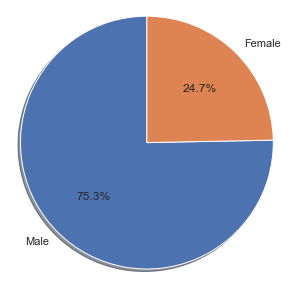

In [133]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

Gender_vals = train_data['Gender'].value_counts().tolist()
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Male', 'Female']
plt.pie(Gender_vals, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
#         colors= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
       )
axis = plt.axis('equal')
plt.style.use(('ggplot'))

### Observe purchase amount effect based on gender and their martital status.

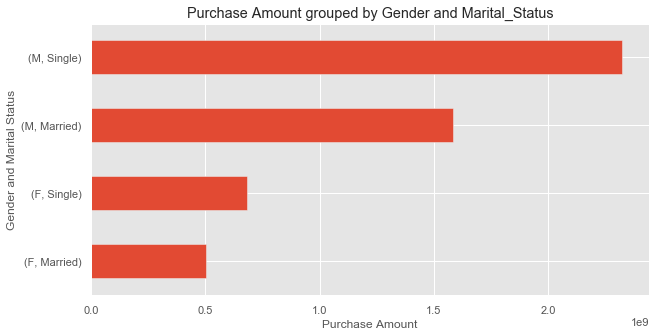

In [134]:
groupby=train_data.groupby(['Gender','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Gender and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Gender and Marital Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and marital status.

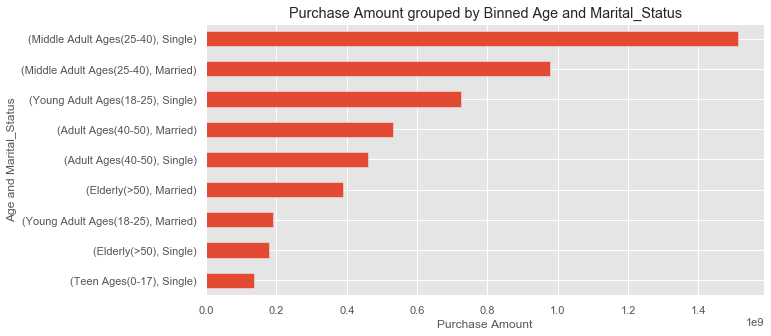

In [135]:
groupby=train_data.groupby(['Binned_Age','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation.

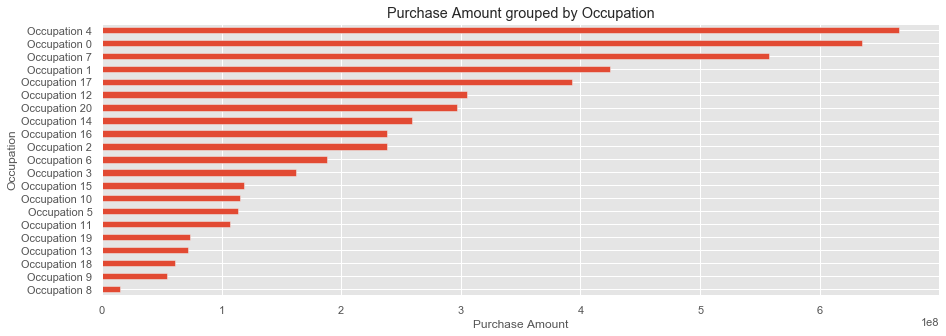

In [136]:
groupby=train_data.groupby('Occupation').sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(15, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and occupation. 

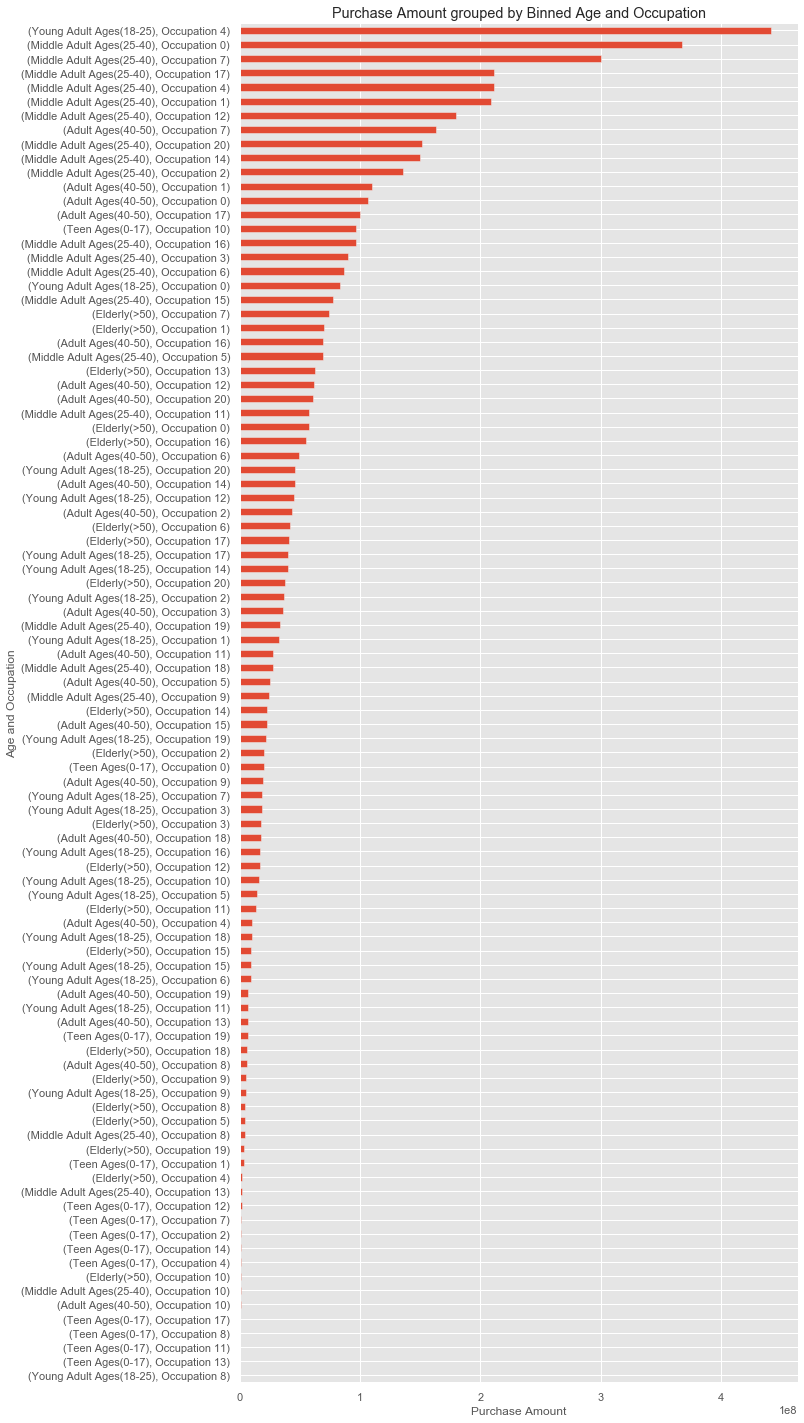

In [137]:
groupby=train_data.groupby(['Binned_Age','Occupation']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 25))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation and city category.

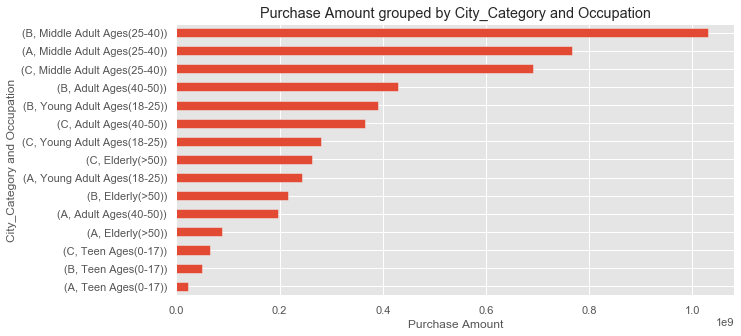

In [138]:
groupby=train_data.groupby(['City_Category','Binned_Age']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by City_Category and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('City_Category and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person staying in the city for number of years.

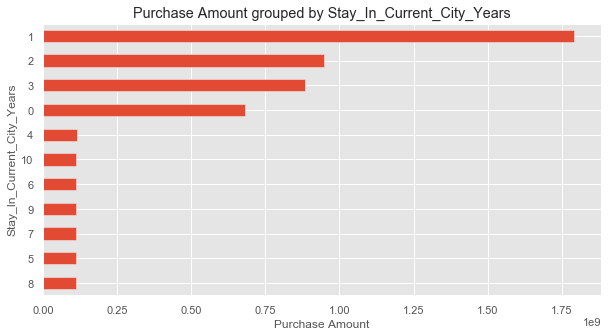

In [139]:
groupby=train_data.groupby(['Stay_In_Current_City_Years']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Stay_In_Current_City_Years')
plt.xlabel('Purchase Amount')
plt.ylabel('Stay_In_Current_City_Years')
plt.style.use(('ggplot'))

### Observe purchase amount based on customers maritial status.

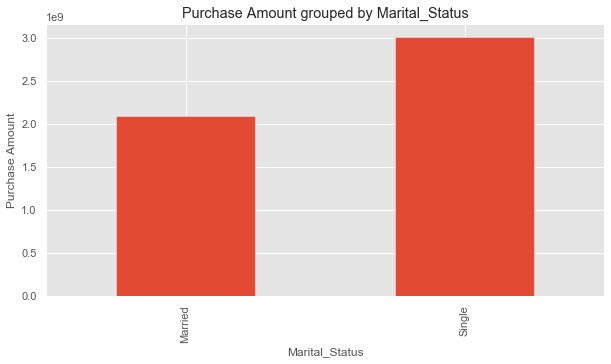

In [140]:
groupby=train_data.groupby('Marital_Status').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by Marital_Status')
plt.ylabel('Purchase Amount')
plt.xlabel('Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount by city category.

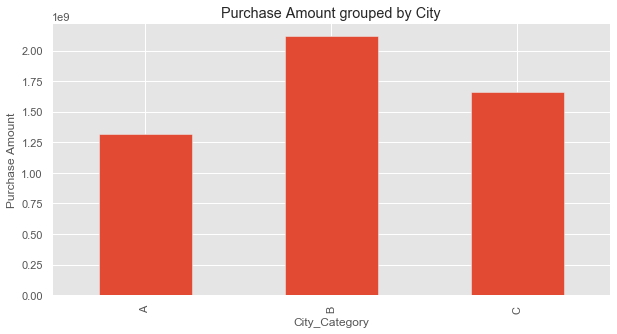

In [141]:
groupby=train_data.groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City')
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the most bought product and its count.

In [142]:
print("The most bought Product: ", train_data.Product_ID.loc[train_data.Product_Count==np.max(train_data.Product_Count.unique())].unique()[0])
print('The most bought prouduct count: ', np.max(train_data.Product_Count.unique()))

The most bought Product:  P00265242
The most bought prouduct count:  1880


### Observe most bought product based on city category.

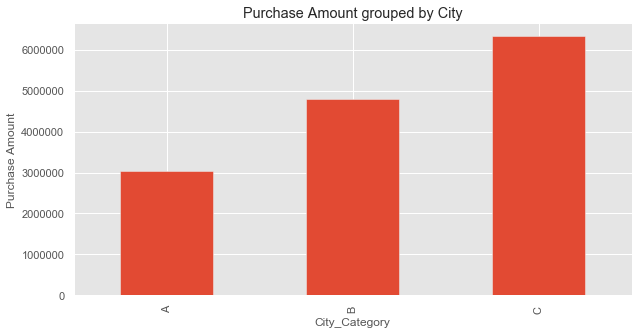

In [143]:
groupby=train_data.loc[train_data.Product_ID=='P00265242'].groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City') 
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the user who has bought the maximum number of products.

In [144]:
print ("The user who has bought maximum number of products: ", train_data.User_ID.loc[train_data.User_Count==np.max(train_data.User_Count.unique())].unique()[0])

The user who has bought maximum number of products:  1001680


### Products which the user who has bought most number of products.

In [145]:
train_data.loc[train_data.User_ID==1001680]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
11055,1001680,P00036742,M,28,Occupation 20,A,3,Married,1,16,NA,15670,1026,185,2,Middle Adult Ages(25-40)
11056,1001680,P00130642,M,26,Occupation 20,A,3,Married,11,16,NA,6139,1026,485,2,Middle Adult Ages(25-40)
11057,1001680,P00105442,M,31,Occupation 20,A,3,Married,11,NA,NA,7607,1026,125,1,Middle Adult Ages(25-40)
11058,1001680,P00245642,M,27,Occupation 20,A,3,Married,5,11,12,8715,1026,691,3,Middle Adult Ages(25-40)
11059,1001680,P00123342,M,26,Occupation 20,A,3,Married,11,NA,NA,4472,1026,19,1,Middle Adult Ages(25-40)
11060,1001680,P00280442,M,29,Occupation 20,A,3,Married,11,NA,NA,7378,1026,228,1,Middle Adult Ages(25-40)
11061,1001680,P00269242,M,33,Occupation 20,A,3,Married,11,13,NA,5965,1026,51,2,Middle Adult Ages(25-40)
11062,1001680,P00180442,M,32,Occupation 20,A,3,Married,11,NA,NA,7630,1026,105,1,Middle Adult Ages(25-40)
11063,1001680,P00049942,M,30,Occupation 20,A,3,Married,11,15,NA,4705,1026,105,2,Middle Adult Ages(25-40)
11064,1001680,P00359342,M,34,Occupation 20,A,3,Married,11,NA,NA,7521,1026,61,1,Middle Adult Ages(25-40)


### Total number of users who shopped during black friday.

In [146]:
len(train_data.User_ID.unique())

5891

### One-Hot Encoding

In [147]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
0,1000001,P00069042,F,1,Occupation 10,A,2,Single,3,NA,NA,8370,35,227,1,Teen Ages(0-17)
1,1000001,P00248942,F,5,Occupation 10,A,2,Single,1,6,14,15200,35,581,3,Teen Ages(0-17)
2,1000001,P00087842,F,3,Occupation 10,A,2,Single,12,NA,NA,1422,35,102,1,Teen Ages(0-17)
3,1000001,P00085442,F,12,Occupation 10,A,2,Single,12,14,NA,1057,35,341,2,Teen Ages(0-17)
4,1000002,P00285442,M,77,Occupation 16,C,10,Single,8,NA,NA,7969,77,203,1,Elderly(>50)


In [148]:
train_data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                            int64
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                object
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
User_Count                     int64
Product_Count                  int64
Product_Category_Count         int64
Binned_Age                    object
dtype: object

In [199]:
columns = ['Product_ID', 'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
           'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Product_Count', 
           'Product_Category_Count', 'Binned_Age', 'Purchase']

In [200]:
train_data = train_data[columns]
test_data = test_data[columns[:len(columns) - 1]]

In [201]:
categorical_columns = ['Product_ID', 'Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_2', 'Product_Category_3', 'Binned_Age']

In [202]:
train_data['Product_Category_2'].unique()

array(['NA', '6.0', '14.0', '2.0', '8.0', '15.0', '16.0', '11.0', '5.0',
       '3.0', '4.0', '12.0', '9.0', '10.0', '17.0', '13.0', '7.0', '18.0'],
      dtype=object)

In [203]:
labelEncoder = preprocessing.LabelEncoder()
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda col: labelEncoder.fit_transform(col))
test_data[categorical_columns] = test_data[categorical_columns].apply(lambda col: labelEncoder.fit_transform(col))

In [204]:
# train_data = pd.get_dummies(train_data, columns=categorical_columns, prefix_sep="_")

In [206]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV, LassoCV

In [207]:
X = train_data.drop(['Purchase'], axis=1)
y = train_data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [208]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
scaler.fit(test_data)
test_data = scaler.transform(test_data)

In [210]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mae = mean_absolute_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('AME is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('AME is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4499.419567651313
AME is 3451.078548752924
R2 score is 0.19735076810218266


The model performance for testing set
--------------------------------------
RMSE is 4500.767808346258
AME is 3452.3899376823533
R2 score is 0.1979712328621155


In [215]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)
r2 = r2_score(y_test, rf_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('AME is {}'.format(mae))
print('R2 score is {}'.format(r2))

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model performance for testing set
--------------------------------------
RMSE is 4500.767808346258
AME is 3452.3899376823533
R2 score is 0.6569008225651344


In [216]:
predicted_values = rf.predict(test_data)
data = {'Purchase': predicted_values}
new_df = pd.DataFrame(data)
print(new_df)

            Purchase
0       15615.900000
1        9931.300000
2        6008.500000
3        2112.400000
4        2737.125000
5        7964.800000
6       10033.100000
7       11479.900000
8       12631.500000
9        5131.700000
10      14768.766667
11       6359.000000
12       5158.100000
13       6205.700000
14      13958.500000
15      15980.000000
16      16897.900000
17       5687.700000
18       6988.550000
19       8537.900000
20       6644.025000
21      12498.800000
22      13459.200000
23      10633.200000
24       6055.400000
25       7397.800000
26      19544.000000
27      11192.383333
28       9705.191667
29       9504.438095
...              ...
233569  17288.450000
233570  11298.400000
233571  14915.900000
233572   8487.800000
233573  11387.800000
233574   5356.214286
233575  15786.400000
233576   6733.000000
233577  11840.177778
233578  10177.266667
233579  14757.400000
233580   7088.600000
233581  18561.300000
233582  18865.800000
233583   2553.400000
233584  12466

In [212]:
xgb  = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)
r2 = r2_score(y_test, pred)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('AME is {}'.format(mae))
print('R2 score is {}'.format(r2))

C:\Users\Karan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:28:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The model performance for testing set
--------------------------------------
RMSE is 4500.767808346258
AME is 3452.3899376823533
R2 score is 0.6856454255316141


In [214]:
predicted_values = xgb.predict(test_data)
data = {'Purchase': predicted_values}
new_df = pd.DataFrame(data)
print(new_df)

            Purchase
0       14961.284180
1       10516.301758
2        5865.629395
3        2573.407715
4        3338.257324
5       10667.692383
6       12957.092773
7       10498.740234
8       14675.918945
9        6078.350586
10      15201.184570
11       5475.970703
12       6373.915039
13       6314.553223
14      17124.902344
15      13196.941406
16      14854.290039
17       6299.697754
18       7473.951172
19      10398.501953
20       6564.696289
21      12272.863281
22      13650.709961
23      11445.320312
24       5784.742676
25       5862.640625
26      16228.140625
27      11674.198242
28      11360.349609
29      11549.390625
...              ...
233569  14489.159180
233570  12164.270508
233571  12141.226562
233572   8528.125977
233573  14185.365234
233574   5818.018066
233575  12998.963867
233576   6628.219238
233577  14055.967773
233578  12972.918945
233579  13233.582031
233580   8186.774414
233581  16358.027344
233582  15552.066406
233583   3756.931641
233584  13242